***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

##  Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

## <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize as células abaixo para importar as bibliotecas que precisar e para configurações gerais
#### <font color='red'>Sugestões: dplyr, ggplot2 etc.</font>

In [2]:
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [89]:
options(repr.plot.width = 10, repr.plot.height = 6)
formatos <- theme(
        plot.title = element_text(size = 18, hjust = 0.5),
        axis.title.y = element_text(size = 16, vjust = 0.6),
        axis.title.x = element_text(size = 16, vjust = -0.6),
        axis.text.y = element_text(size = 14),
        axis.text.x = element_text(size = 14)
    )

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [3]:
dados <- read.csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [137]:
dados

UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,ClasseRenda,Cat.Sexo
<int>,<fct>,<int>,<fct>,<int>,<int>,<dbl>,<fct>,<fct>
11,0,23,8,12,800,1.603808,E,0
11,1,23,2,12,1150,1.739790,E,1
11,1,35,8,15,880,1.760444,E,1
11,0,46,2,6,3500,1.783158,D,0
11,1,47,8,9,150,1.690631,E,1
11,1,34,8,12,790,1.637906,E,1
11,0,57,8,12,3150,1.570078,D,0
11,1,60,8,12,1700,1.608495,D,1
11,1,50,4,14,1800,1.780329,D,1


### Para avaliar o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [60]:
classesRenda <- c(min(dados$Renda), 1576, 3940, 11820, 19700, max(dados$Renda))

### 2º Definir os labels das classes

In [6]:
descricaoClassesRenda <- c('E','D', 'C', 'B', 'A')

In [85]:
classificarRenda <- function(renda) {
    case_when(
        renda < 1576 ~ 'E',
        renda < 3940 ~ 'D',
        renda < 11820 ~ 'C',        
        renda >= 19700 ~ 'B',        
        TRUE ~ 'A'
    )
}

dados$ClasseRenda <- as.factor(classificarRenda(dados$Renda))
dados$Sexo <- as.factor(dados$Sexo)
dados$Cor <- as.factor(dados$Cor)

### 3º Construir a coluna de frequências

In [77]:
freqRenda <- table(
    cut(
        x = dados$Renda,
        breaks = classesRenda,
        labels = descricaoClassesRenda,
        include.lowest = TRUE
    )
)

### 4º Construir a coluna de percentuais

In [78]:
percRenda <- prop.table(freqRenda) * 100

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [79]:
tabelaFrequenciaRenda <- cbind(
    freqAbsoluta = freqRenda, 
    freqRelativa = percRenda
)
tabelaFrequenciaRenda <- tabelaFrequenciaRenda[order(rownames(tabelaFrequenciaRenda)),]
tabelaFrequenciaRenda <- data.frame(tabelaFrequenciaRenda)

In [80]:
tabelaFrequenciaRenda

,freqAbsoluta,freqRelativa
,<dbl>,<dbl>
A,420,0.5465903
B,822,1.0697553
C,7241,9.4234774
D,18602,24.2087454
E,49755,64.7514315


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

#### <font color='red'>Lembre-se de transformar a matriz de resultados em um data frame.</font>

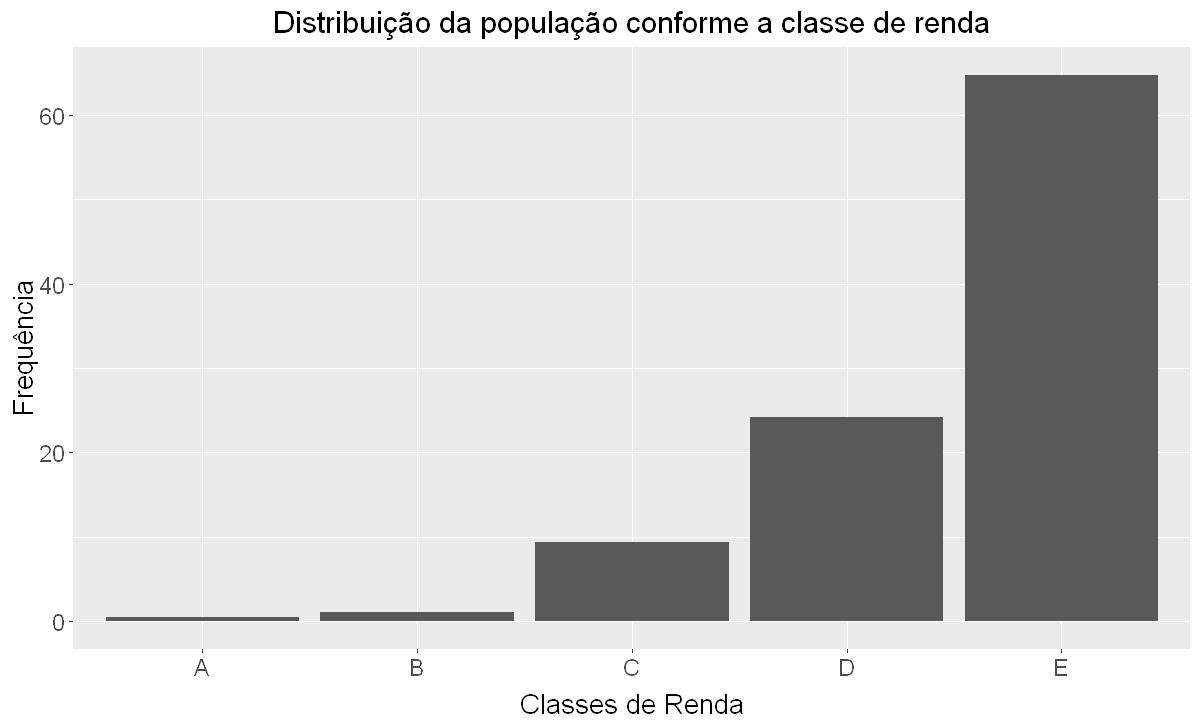

In [88]:
ggplot(tabelaFrequenciaRenda, aes(x = row.names(tabelaFrequenciaRenda), y = freqRelativa)) + 
    geom_bar(stat = 'identity') +
    ggtitle('Distribuição da população conforme a classe de renda') +
    xlab('Classes de Renda') +
    ylab('Frequência') +
    formatos

> ### Conclusões

* A maioria absoluta da amostra estudada pertence à classe E, com renda de até 2SM.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

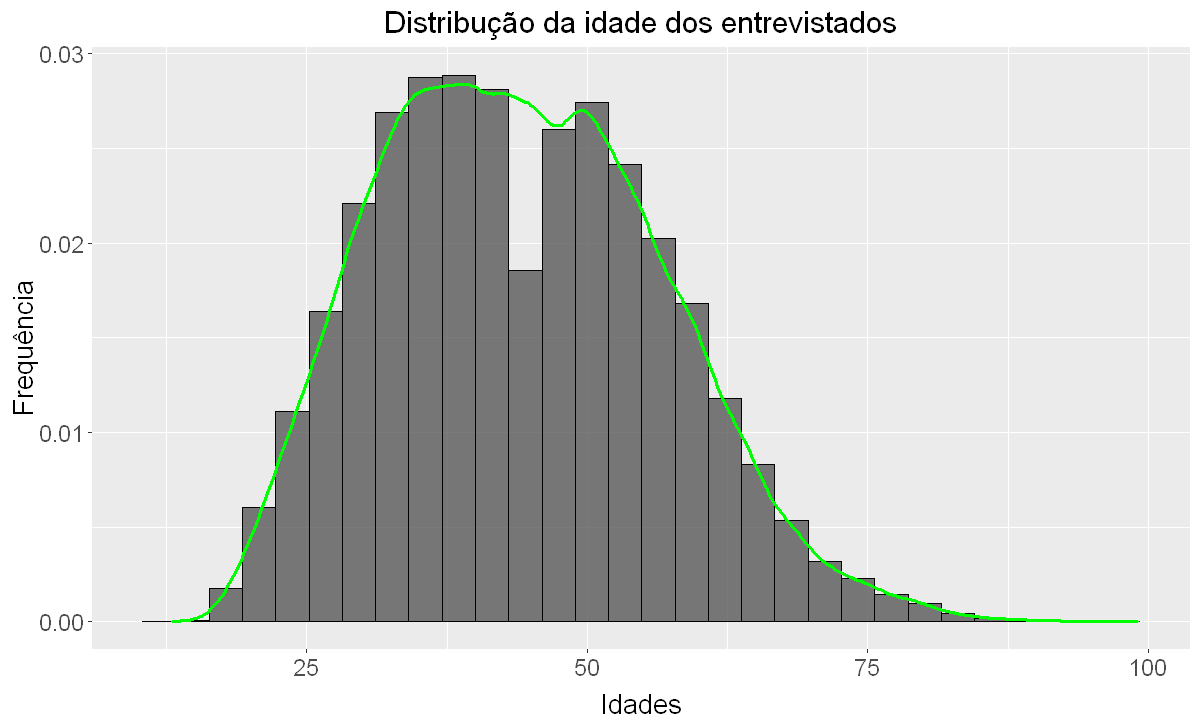

In [125]:
ggplot(dados, aes(x = Idade, y = ..density..)) +
    geom_histogram(color='black', alpha=0.8, bins = 30) +
    geom_density(color = 'green', size = 1) +
    ggtitle('Distribução da idade dos entrevistados') +
    xlab('Idades') +
    ylab('Frequência') +
    formatos

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



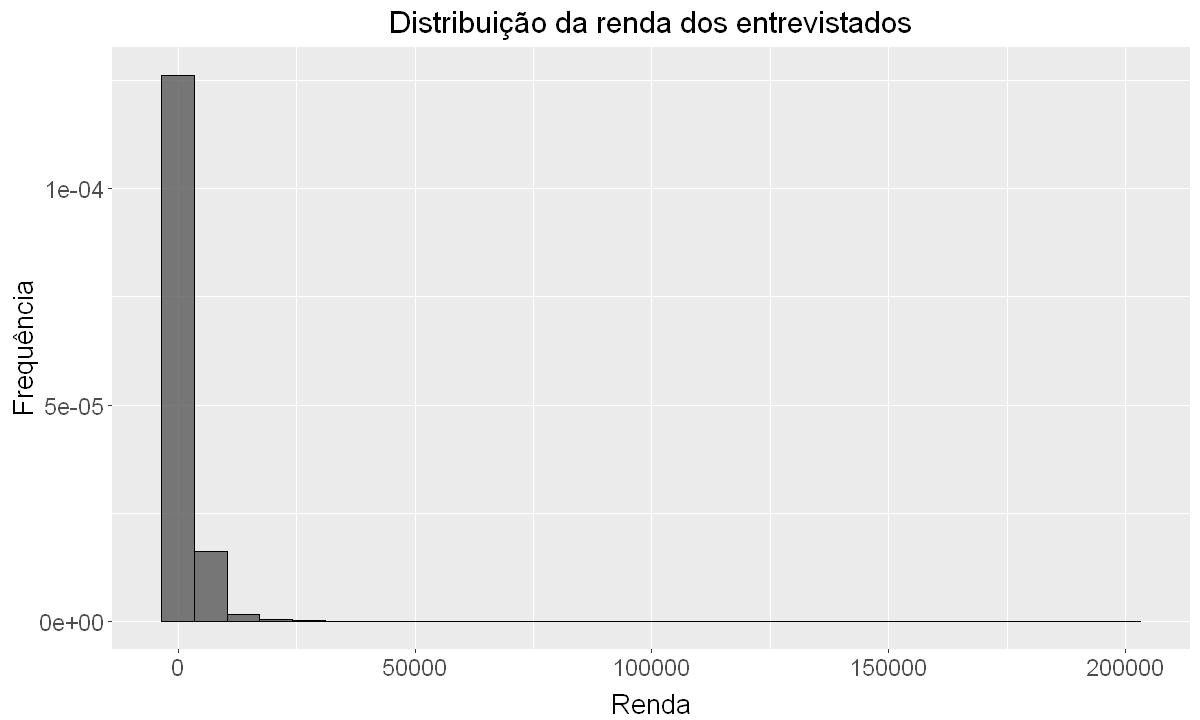

In [128]:
ggplot(dados, aes(x = Renda, y = ..density..)) + 
    geom_histogram(color = "black", alpha = 0.8) +     
    ggtitle('Distribuição da renda dos entrevistados') +
    ylab("Frequência") + 
    xlab("Renda") +     
    formatos

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



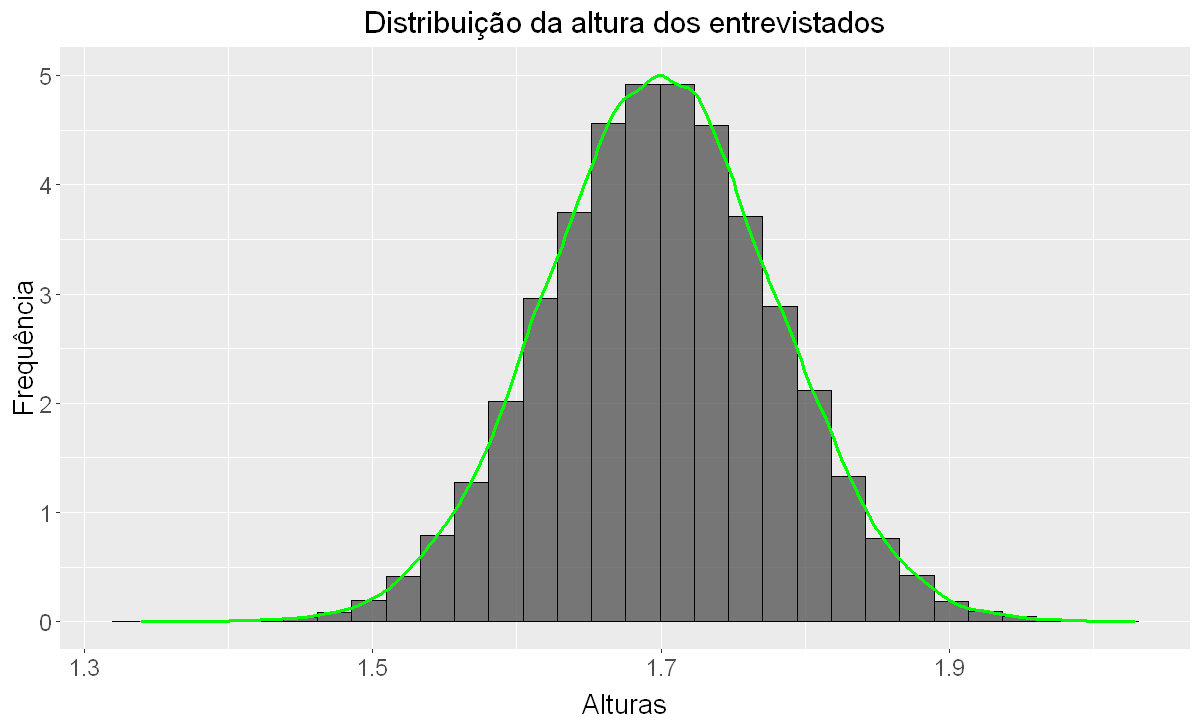

In [127]:
ggplot(dados, aes(x = Altura, y = ..density..)) + 
    geom_histogram(color = "black", alpha = 0.8) + 
    geom_density(color = 'green', size = 1) +
    ggtitle('Distribuição da altura dos entrevistados') +
    ylab("Frequência") + 
    xlab("Alturas") +     
    formatos

> ### Conclusões

Escreva suas conclusões aqui...

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

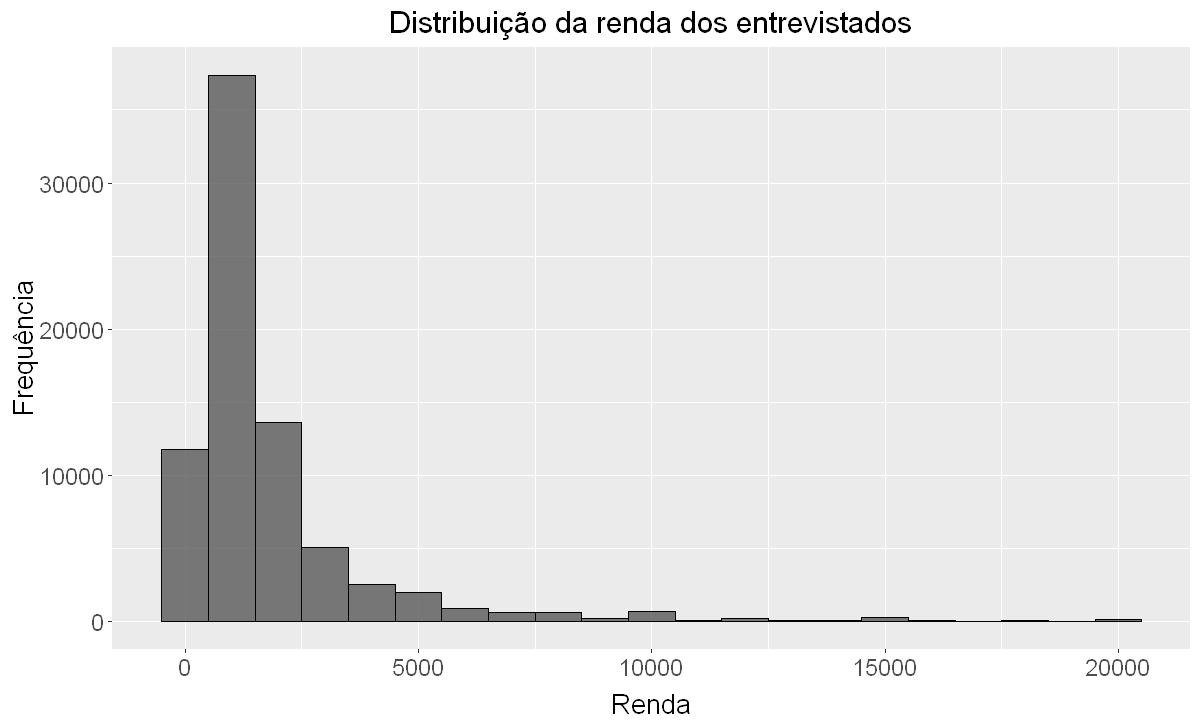

In [132]:
ggplot(dados[dados$Renda <= 20000,], aes(x = Renda)) + 
    geom_histogram(color = "black", alpha = 0.8, binwidth=1000) +     
    ggtitle('Distribuição da renda dos entrevistados') +
    ylab("Frequência") + 
    xlab("Renda") +     
    formatos

### Construa uma tabela de frequências e uma com os percentuais cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os vetores abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [133]:
sexo = c(
    'Masculino', 
    'Feminino'
)
cor = c(
    'Indígena', 
    'Branca', 
    'Preta', 
    'Amarela', 
    'Parda'
)
anos_de_estudo = c(
    'Sem instrução e menos de 1 ano', 
    '1 ano', 
    '2 anos', 
    '3 anos', 
    '4 anos', 
    '5 anos', 
    '6 anos', 
    '7 anos', 
    '8 anos', 
    '9 anos', 
    '10 anos', 
    '11 anos', 
    '12 anos', 
    '13 anos', 
    '14 anos', 
    '15 anos ou mais', 
    'Não determinados'
)

In [142]:
dados$Cat.Sexo <- factor(dados$Sexo)
levels(dados$Cat.Sexo) <- sexo

dados$Cat.Cor <- factor(dados$Cor)
levels(dados$Cat.Cor) <- cor

dados$Cat.Anos.de.Estudo <- factor(dados$Anos.de.Estudo, order = TRUE)
levels(dados$Cat.Anos.de.Estudo) <- anos_de_estudo

In [145]:
frequencia <- table(dados$Cat.Sexo, dados$Cat.Cor)
frequencia <- cbind(frequencia)
frequencia

,Indígena,Branca,Preta,Amarela,Parda
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [146]:
percentual <- cbind(prop.table(frequencia))
percentual

,Indígena,Branca,Preta,Amarela,Parda
Masculino,0.003331598,0.2888339,0.07160333,0.003058303,0.3261713
Feminino,0.001314420,0.1252082,0.03759761,0.001522644,0.1413587


> ### Conclusões

Escreva suas conclusões aqui...

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [147]:
mean(dados$Renda)

[1] 2000.383

### Obtenha a mediana

In [148]:
median(dados$Renda)

[1] 1200

### Obtenha a moda

In [150]:
moda <- function(x) {
    frequencias <- table(x)
    return(names(frequencias)[frequencias == max(frequencias)])
}

In [152]:
as.numeric(moda(dados$Renda))

[1] 788

### Obtenha a variância

In [153]:
var(dados$Renda)

[1] 11044906

### Obtenha o desvio-padrão

In [154]:
sd(dados$Renda)

[1] 3323.388

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize *tapply* com as funções *mean*, *median* e *max*</font>

In [155]:
medias <- tapply(
    dados$Renda,
    list(dados$Cat.Sexo, dados$Cat.Cor),
    mean    
)
medias

,Indígena,Branca,Preta,Amarela,Parda
Masculino,1081.711,2925.744,1603.862,4758.251,1659.577
Feminino,2464.386,2109.867,1134.596,3027.342,1176.759


In [157]:
medianas <- tapply(
    dados$Renda,
    list(dados$Cat.Sexo, dados$Cat.Cor),
    median    
)
medianas

,Indígena,Branca,Preta,Amarela,Parda
Masculino,797.5,1700,1200,2800,1200
Feminino,788.0,1200,800,1500,800


In [158]:
maximos <- tapply(
    dados$Renda,
    list(dados$Cat.Sexo, dados$Cat.Cor),
    max    
)
maximos

,Indígena,Branca,Preta,Amarela,Parda
Masculino,10000,200000,50000,50000,100000
Feminino,120000,100000,23000,20000,30000


> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize *tapply* com as funções *var* e *sd*</font>

In [159]:
variancias <- tapply(
    dados$Renda,
    list(dados$Cat.Sexo, dados$Cat.Cor),
    var    
)
variancias

,Indígena,Branca,Preta,Amarela,Parda
Masculino,1449841,22570023,3749294,32957070,5345747
Feminino,142981765,10569087,1821960,13921657,2547960


In [160]:
desvios <- tapply(
    dados$Renda,
    list(dados$Cat.Sexo, dados$Cat.Cor),
    sd    
)
desvios

,Indígena,Branca,Preta,Amarela,Parda
Masculino,1204.093,4750.792,1936.309,5740.825,2312.087
Feminino,11957.498,3251.013,1349.800,3731.174,1596.233


> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes;</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro *fill* da seguinte maneira: *aes(x = Cor, y = Renda, fill = Sexo)*.</font>

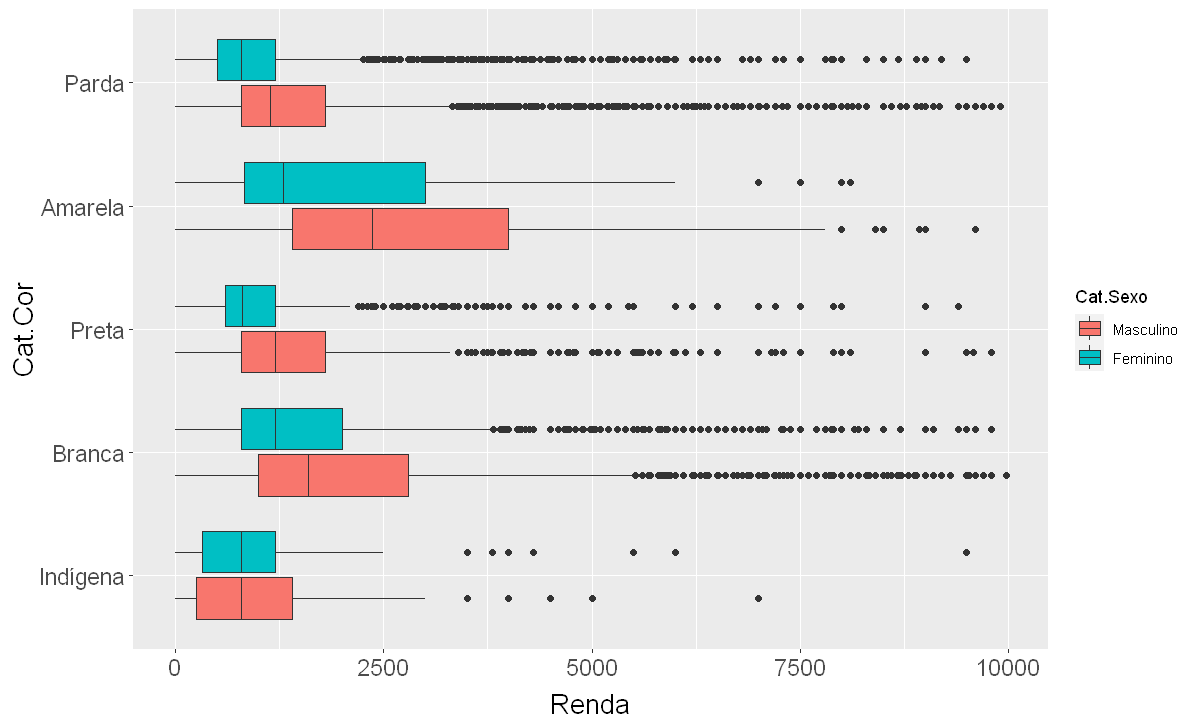

In [162]:
ggplot(dados[dados$Renda < 10000, ], aes(x = Cat.Cor, y = Renda, fill = Cat.Sexo)) +
    geom_boxplot(size=0.2) +
    coord_flip() +
    formatos

> ### Conclusões

Escreva suas conclusões aqui...

### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método *quantile()* para realizar esta análise.</font>

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro *fill* da seguinte maneira: *aes(x = Anos.de.Estudo, y = Renda, fill = Sexo)*.</font>

> ### Conclusões

Escreva suas conclusões aqui...